In [1]:
import numpy as np
import pandas as pd

#visualization 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder

#Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
train = pd.read_csv('Data/train.csv', index_col = 'PassengerId')
test = pd.read_csv('Data/test.csv', index_col = 'PassengerId')
gender_sub = pd.read_csv('gender_submission.csv', index_col = 'PassengerId')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    549
1    342
Name: Survived, dtype: int64

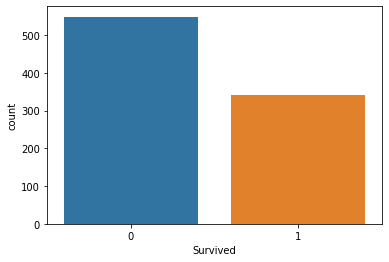

In [3]:
target = train['Survived']

sns.countplot(target)
target.value_counts()

In [4]:
train.drop(['Cabin'], axis = 1, inplace = True)
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [5]:
test.drop(['Cabin'], axis=1, inplace = True)
test.isnull().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64

,Sex,Survived
0,female,0.742038
1,male,0.188908


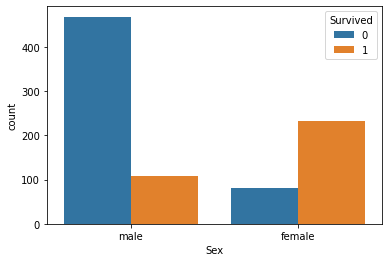

In [6]:
#Survival rate based on gender 

sns.countplot(data=train, x='Sex', hue='Survived')
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [7]:
#Mapping male to 0 and female to 1

gender = {"male" : 0, "female" : 1}
train['Sex'] = train['Sex'].map(gender)
test['Sex'] = test['Sex'].map(gender)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


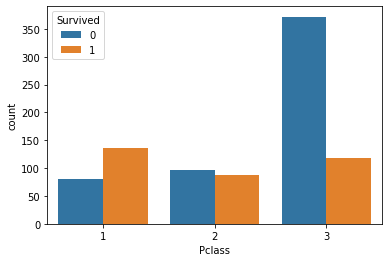

In [8]:
#Survival rate of Pclass 

sns.countplot(data=train, x='Pclass', hue='Survived')
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [9]:
#One hot encoding Pclass col
train['Pclass_3']=(train['Pclass']==3)
train['Pclass_2']=(train['Pclass']==2)
train['Pclass_1']=(train['Pclass']==1)

test['Pclass_3']=(test['Pclass']==3)
test['Pclass_2']=(test['Pclass']==2)
test['Pclass_1']=(test['Pclass']==1)

In [10]:
train.drop(['Pclass'], axis=1, inplace=True)
test.drop(['Pclass'], axis=1, inplace=True)

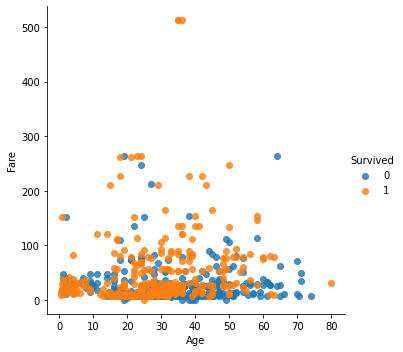

In [11]:
#Relation between Age and Fare
sns.lmplot(data=train, x='Age', y='Fare', fit_reg=False, hue='Survived')

In [12]:
train.drop(['Age'], axis=1, inplace = True)
test.drop(['Age'], axis=1, inplace = True)

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

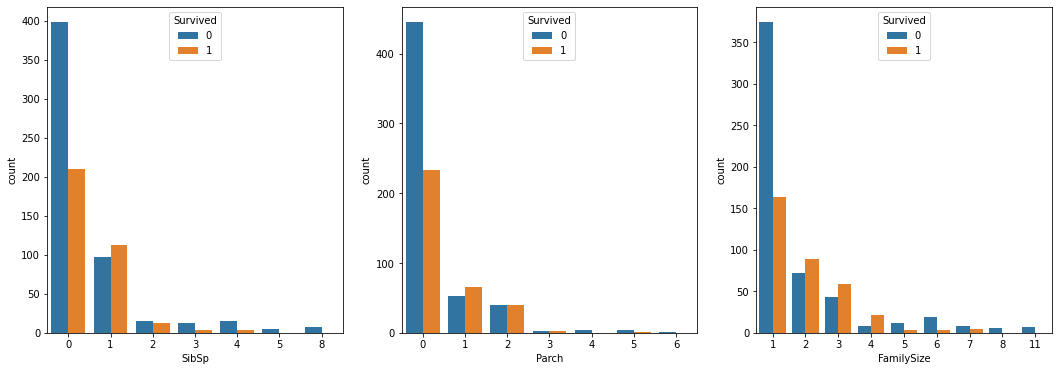

In [13]:
train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=test['SibSp']+test['Parch']+1

figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,6)
sns.countplot(data=train, x='SibSp', hue='Survived', ax=ax1)
sns.countplot(data=train, x='Parch', hue='Survived', ax=ax2)
sns.countplot(data=train, x='FamilySize',hue='Survived', ax=ax3)

<AxesSubplot:xlabel='Big', ylabel='count'>

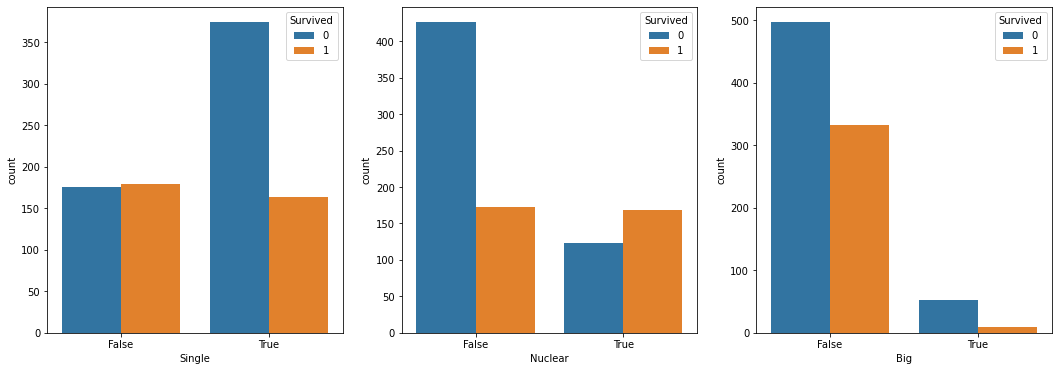

In [14]:
train['Single']=train['FamilySize']==1
train['Nuclear']=(2<=train['FamilySize']) & (train['FamilySize']<=4)
train['Big']=train['FamilySize']>=5

test['Single']=test['FamilySize']==1
test['Nuclear']=(2<=test['FamilySize']) & (test['FamilySize']<=4)
test['Big']=test['FamilySize']>=5

figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,6)
sns.countplot(data=train, x='Single', hue='Survived', ax=ax1)
sns.countplot(data=train, x='Nuclear', hue='Survived', ax=ax2)
sns.countplot(data=train, x='Big',hue='Survived', ax=ax3) 

In [15]:
train.drop(['Single','Big','SibSp','Parch','FamilySize'], axis=1, inplace = True)
test.drop(['Single','Big','SibSp','Parch','FamilySize'], axis=1, inplace = True)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


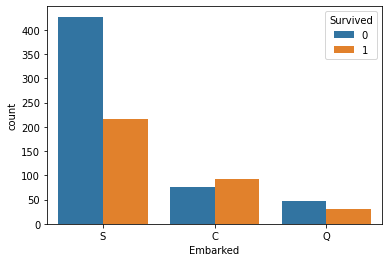

In [16]:
sns.countplot(data=train, x='Embarked', hue='Survived')
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [17]:
train['EmbarkedC']=train['Embarked']=='C'
train['EmbarkedS']=train['Embarked']=='S'
train['EmbarkedQ']=train['Embarked']=='Q'
test['EmbarkedC']=test['Embarked']=='C'
test['EmbarkedS']=test['Embarked']=='S'
test['EmbarkedQ']=test['Embarked']=='Q'

train.drop(['Embarked'], axis=1, inplace=True)
test.drop(['Embarked'], axis=1, inplace = True)

In [18]:
test.head()

,Name,Sex,Ticket,Fare,Pclass_3,Pclass_2,Pclass_1,Nuclear,EmbarkedC,EmbarkedS,EmbarkedQ
PassengerId,,,,,,,,,,,
892,"Kelly, Mr. James",0,330911,7.8292,True,False,False,False,False,False,True
893,"Wilkes, Mrs. James (Ellen Needs)",1,363272,7.0000,True,False,False,True,False,True,False
894,"Myles, Mr. Thomas Francis",0,240276,9.6875,False,True,False,False,False,False,True
895,"Wirz, Mr. Albert",0,315154,8.6625,True,False,False,False,False,True,False
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,3101298,12.2875,True,False,False,True,False,True,False


In [19]:
train['Name']=train['Name'].str.split(', ').str[1].str.split('. ').str[0]
test['Name']=test['Name'].str.split(', ').str[1].str.split('. ').str[0]

,Name,Survived
16,th,1.000000
9,Mlle,1.000000
15,Sir,1.000000
13,Ms,1.000000
5,Lady,1.000000
10,Mme,1.000000
12,Mrs,0.792000
8,Miss,0.697802
7,Master,0.575000
1,Col,0.500000


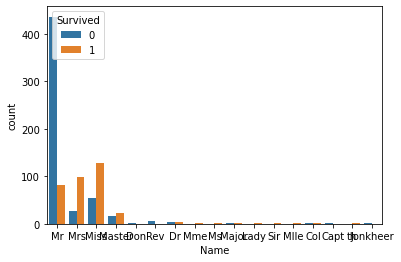

In [20]:
sns.countplot(data=train, x='Name', hue='Survived')
train[["Name", "Survived"]].groupby(['Name'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [21]:
train['Master']=(train['Name']=='Master')
test['Master']=(test['Name']=='Master')

train.drop(['Name'], axis=1, inplace=True)
test.drop(['Name'], axis=1, inplace=True)

train.drop(['Ticket'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)


In [22]:
test.loc[test['Fare'].isnull(),'Fare']=0
# train.loc[test['Embarked'].isnull(),'Embarked']=0

In [23]:
Ytrain=train['Survived']
feature_names=list(test)
Xtrain=train[feature_names]
Xtest=test[feature_names]

print(Xtrain.shape, Ytrain.shape, Xtest.shape)
Xtrain.head()

(891, 10) (891,) (418, 10)


,Sex,Fare,Pclass_3,Pclass_2,Pclass_1,Nuclear,EmbarkedC,EmbarkedS,EmbarkedQ,Master
PassengerId,,,,,,,,,,
1,0,7.2500,True,False,False,True,False,True,False,False
2,1,71.2833,False,False,True,True,True,False,False,False
3,1,7.9250,True,False,False,False,False,True,False,False
4,1,53.1000,False,False,True,True,False,True,False,False
5,0,8.0500,True,False,False,False,False,True,False,False


In [24]:
submission=pd.read_csv('gender_submission.csv', index_col='PassengerId')

model=DecisionTreeClassifier(max_depth=8, random_state=18)
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# random_state is an arbitrary number.
model.fit(Xtrain, Ytrain)
predictions=model.predict(Xtest)
submission['Survived']=predictions
# submission.to_csv('Result.csv')
submission.head(10)

cross_val_score(model, Xtrain, Ytrain, cv=kfold, scoring='accuracy', ).mean()

0.8585892634207241

In [25]:
rf = RandomForestClassifier(n_estimators=10, max_depth=500, random_state=0)
cross_val_score(rf, Xtrain, Ytrain, cv=kfold, scoring='accuracy', ).mean()

0.8305368289637952

In [26]:
feature_names

['Sex',
 'Fare',
 'Pclass_3',
 'Pclass_2',
 'Pclass_1',
 'Nuclear',
 'EmbarkedC',
 'EmbarkedS',
 'EmbarkedQ',
 'Master']

In [27]:
test

,Sex,Fare,Pclass_3,Pclass_2,Pclass_1,Nuclear,EmbarkedC,EmbarkedS,EmbarkedQ,Master
PassengerId,,,,,,,,,,
892,0,7.8292,True,False,False,False,False,False,True,False
893,1,7.0000,True,False,False,True,False,True,False,False
894,0,9.6875,False,True,False,False,False,False,True,False
895,0,8.6625,True,False,False,False,False,True,False,False
896,1,12.2875,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1305,0,8.0500,True,False,False,False,False,True,False,False
1306,1,108.9000,False,False,True,False,True,False,False,False
1307,0,7.2500,True,False,False,False,False,True,False,False
